# <span style="color:brown">Tourism Package @ Visit with Us Modelling Project</span>

### Background and Context

- You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

- A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

- One of the ways to expand the customer base is to introduce a new offering of packages.

- Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

- However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

- The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

- However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

### **Problem Statement:**

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

# <span style="color:blue">Objective</span>:

To build a model to predict which customer is potentially going to purchase the newly introduced travel package.

### Data Dictionary:
LABELS | DESCRIPTION
-------|:------------
 CustomerID| Unique customer ID
 ProdTaken |Whether the customer has purchased a package or not (0: No, 1: Yes)
 Age| Age of customer
TypeofContact | How customer was contacted (Company Invited or Self Inquiry)
 CityTier | City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
 DurationOfPitch| Duration of the pitch by a salesperson to the customer
 Occupation| Occupation of customer
 Gender| Gender of customer
 NumberOfPersonVisiting| Total number of persons planning to take the trip with the customer
 NumberOfFollowups| Total number of follow-ups has been done by the salesperson after the sales pitch
ProductPitched| Product pitched by the salesperson
 PreferredPropertyStar| Preferred hotel property rating by customer
 MaritalStatus| Marital status of customer
 NumberOfTrips| Average number of trips in a year by customer
 Passport| The customer has a passport or not (0: No, 1: Yes)
 PitchSatisfactionScore| Sales pitch satisfaction score
 OwnCar| Whether the customers own a car or not (0: No, 1: Yes)
 NumberOfChildrenVisiting| Total number of children with age less than 5 planning to take the trip with the customer
 Designation| Designation of the customer in the current organization
 MonthlyIncome| Gross monthly income of the customer

### Let's start by importing necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
#pip install xgboost

### Load and overview the dataset

In [3]:
#Loading the dataset - sheet_name parameter is used if there are Basicple tabs in the excel file.
Tourism_data=pd.read_excel("Tourism.xlsx",sheet_name='Tourism')

In [4]:
Tourism_data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
Tourism_data.groupby("Designation").mean()["MonthlyIncome"]

Designation
AVP               32241.046784
Executive         19939.922507
Manager           22643.157629
Senior Manager    26637.749326
VP                35878.947826
Name: MonthlyIncome, dtype: float64

In [6]:
Tourism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- There are total of 20 columns and 4,888 datas in the dataset
- There are 8 columns that have less than 4,888 non-null values. These columns have missing values.

**Check the percentage of missing values in each column**

In [7]:
pd.DataFrame(data={'% of Missing values':round(Tourism_data.isna().sum()/Tourism_data.isna().count()*100,2)})

,% of Missing values
CustomerID,0.00
ProdTaken,0.00
Age,4.62
TypeofContact,0.51
CityTier,0.00
DurationOfPitch,5.14
Occupation,0.00
Gender,0.00
NumberOfPersonVisiting,0.00
NumberOfFollowups,0.92


***Percenatge of Missing values in following colums***

- `Age` - 4.62
- `TypeofContact` - 0.51
- `DurationOfPitch` - 5.14
-  `NumberOfFollowups` - 0.92
- `PreferredPropertyStar` - 0.53 
- `NumberOfTrips` - 2.86
- `NumberOfChildrenVisiting` - 1.35 
- `MonthlyIncome`- 4.77

 We need to impute these values after data splitinng into train & test sets.

**Let's check the number of unique values in each column**

In [8]:
Tourism_data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

- We can drop the column - CustomerID as it is unique for each customer and will not add value to the model.
- Most of the variables are categorical except - `Age, duration of pitch, monthly income`, and `number of trips` of customers.

In [9]:
#Dropping CustomerID column
Tourism_data.drop(columns='CustomerID',inplace=True)

**Summary of the data**

In [10]:
Tourism_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,NaN,NaN,NaN,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,NaN,NaN,NaN,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888.0,NaN,NaN,NaN,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,NaN,NaN,NaN,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,3,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888.0,NaN,NaN,NaN,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,NaN,NaN,NaN,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
ProductPitched,4888,5,Basic,1842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Mean and median of `age` are 37 and 36 respectively.
- `Duration of pitch` 50th percentile value is 13 and the max value is 127.
- `Number of Trips` has 50th % as 3.
- Min and max for `NumberOfPersonVisiting` is 1 and 5 respectively.
- The `number of trips` also has some outliers as the 75th percentile value is 4 and the max value is 22.


**Let's check the count of each unique category in each of the categorical variables.** 

In [11]:
#Making a list of all catrgorical variables 
Cat_columns=['TypeofContact', 'CityTier','Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation']

#Printing number of count of each unique value in each column
for column in Cat_columns:
    print(Tourism_data[column].value_counts())
    print('=='*25)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
0    3466
1    1422
Name: Passport, dtype: int64
3    1478
5     970
1     942
4     912
2     586
Name: PitchSatisfactionScore, dtype

- The Free lancer category in the `occupation` column has just 2 values out of 4,888 samples.
- `Gender` has 3 unique values which include - 'Fe Male' and 'Female'. This must be a data input error, we should    replace 'Fe Male' with 'Female'.
- There are 3 etries in `NumberOfPersonVisiting` having value of 5.
- There are 3032 people owning a car.
-  There are 3444 people who are doing `SelfEnquiry`
- There are only 136 people who are 6 times `NumberOfFollowups`.


In [12]:
#Replacing 'Fe Male' with 'Female'
Tourism_data.Gender=Tourism_data.Gender.replace('Fe Male', 'Female')

In [13]:
#Converting the data type of each categorical variable to 'category'
for column in Cat_columns:
    Tourism_data[column]=Tourism_data[column].astype('category')

In [14]:
Tourism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4843 non-null   category
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

# Exploratory Data Analysis 
* We will break it into 2 category

## Univariate Analysis

In [15]:
def boxplot_histogram(feature, figsize=(10, 7), bins=None):
    """ 
    Combine Boxplot and histogram
    figsize: size of fig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='orange') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='dashdot');# Add median to the histogram

### Analysis of Age

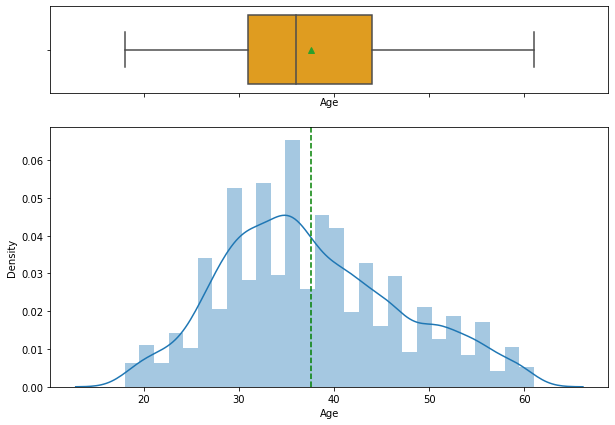

In [16]:
boxplot_histogram(Tourism_data.Age)

- `Age` distribution looks normally distributed.
- The boxplot for the `age` shows that there are no outliers


### Analysis of Duration of Pitch

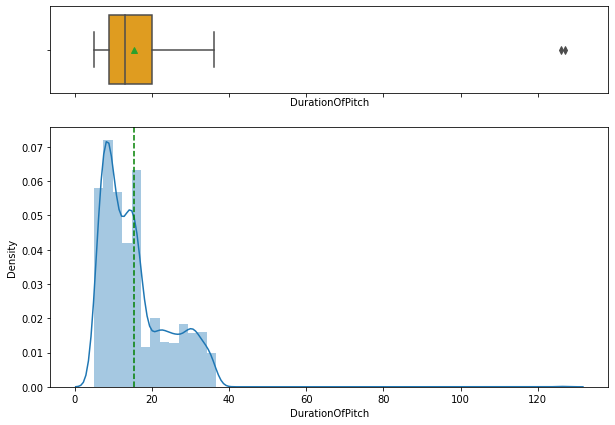

In [17]:
boxplot_histogram(Tourism_data.DurationOfPitch)

- The distribution for the `duration of pitch` is right-skewed.
- The `duration of the pitch` for majority customers is less than 20 minutes.
- There are some outliers, due to some points present far away from the upper whisker in the boxplot. 

Let's check how many such extreme values are there.

In [18]:
Tourism_data[(Tourism_data.DurationOfPitch>40)] 

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,0,NaN,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


### Analysis of Monthly Income

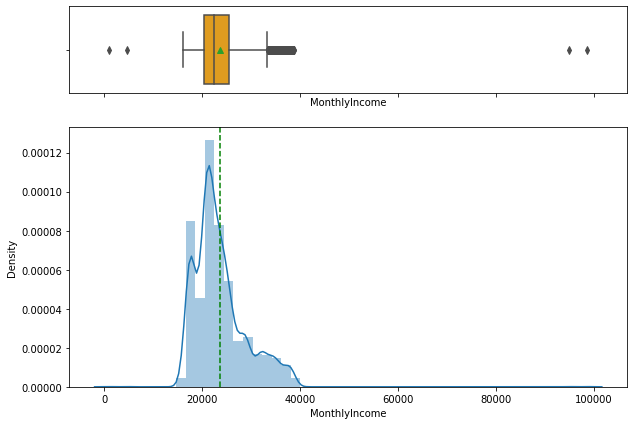

In [19]:
boxplot_histogram(Tourism_data.MonthlyIncome)

- The distribution for `monthly` income shows that most values lie between 20k to 40k.
- There are some points on the left and some on the right of the upper whisker of  boxplot which can be considered as outliers. 

Let's check how many such extreme values are there. 

In [20]:
Tourism_data[(Tourism_data.MonthlyIncome>40000) | (Tourism_data.MonthlyIncome<10000)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0
2586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0


- There are just four such Analysis of  which can be considered as outliers.

### Analysis of Number of Trips

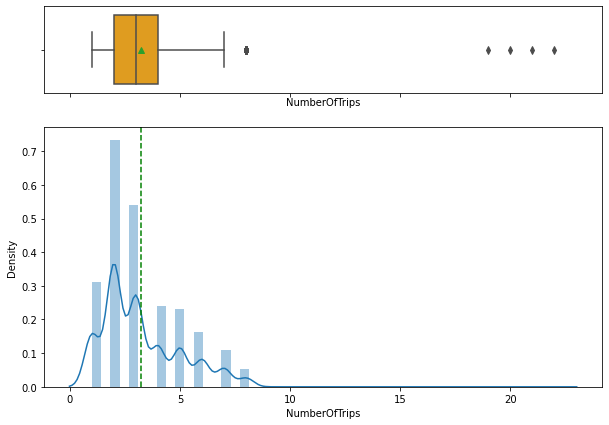

In [21]:
boxplot_histogram(Tourism_data.NumberOfTrips)

- The distribution for the `NumberOfTrips` is right-skewed 
- Boxplot shows that the number of trips has some outliers at the right end. 

In [22]:
#Let's check how many such extreme values are there
Tourism_data[(Tourism_data.NumberOfTrips>8)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0


There are only 4 outliers.

In [23]:
Tourism_data.NumberOfTrips.value_counts(normalize=True)

2.0     0.308340
3.0     0.227254
1.0     0.130581
4.0     0.100674
5.0     0.096462
6.0     0.067818
7.0     0.045914
8.0     0.022115
20.0    0.000211
19.0    0.000211
22.0    0.000211
21.0    0.000211
Name: NumberOfTrips, dtype: float64

- Most customers i.e. 52% have taken 2 or 3 trips.
- Very few poeple do large no of trips.


**Removing these outliers form duration of pitch, monthly income, and number of trips.**

In [24]:
#Dropping observaions with duration of pitch greater than 40. There are just 2 such Analysis of 
Tourism_data.drop(index=Tourism_data[Tourism_data.DurationOfPitch>40].index,inplace=True)

#Dropping observation with monthly income less than 12000 or greater than 40000. There are just 4 such Analysis of 
Tourism_data.drop(index=Tourism_data[(Tourism_data.MonthlyIncome>40000) | (Tourism_data.MonthlyIncome<12000)].index,inplace=True)

#Dropping Analysis of  with number of trips greater than 8. There are just 4 such Analysis of 
Tourism_data.drop(index=Tourism_data[Tourism_data.NumberOfTrips>8].index,inplace=True)

**Let's define a function to create barplots for the categorical variables indicating percentage of each category for that variables.**

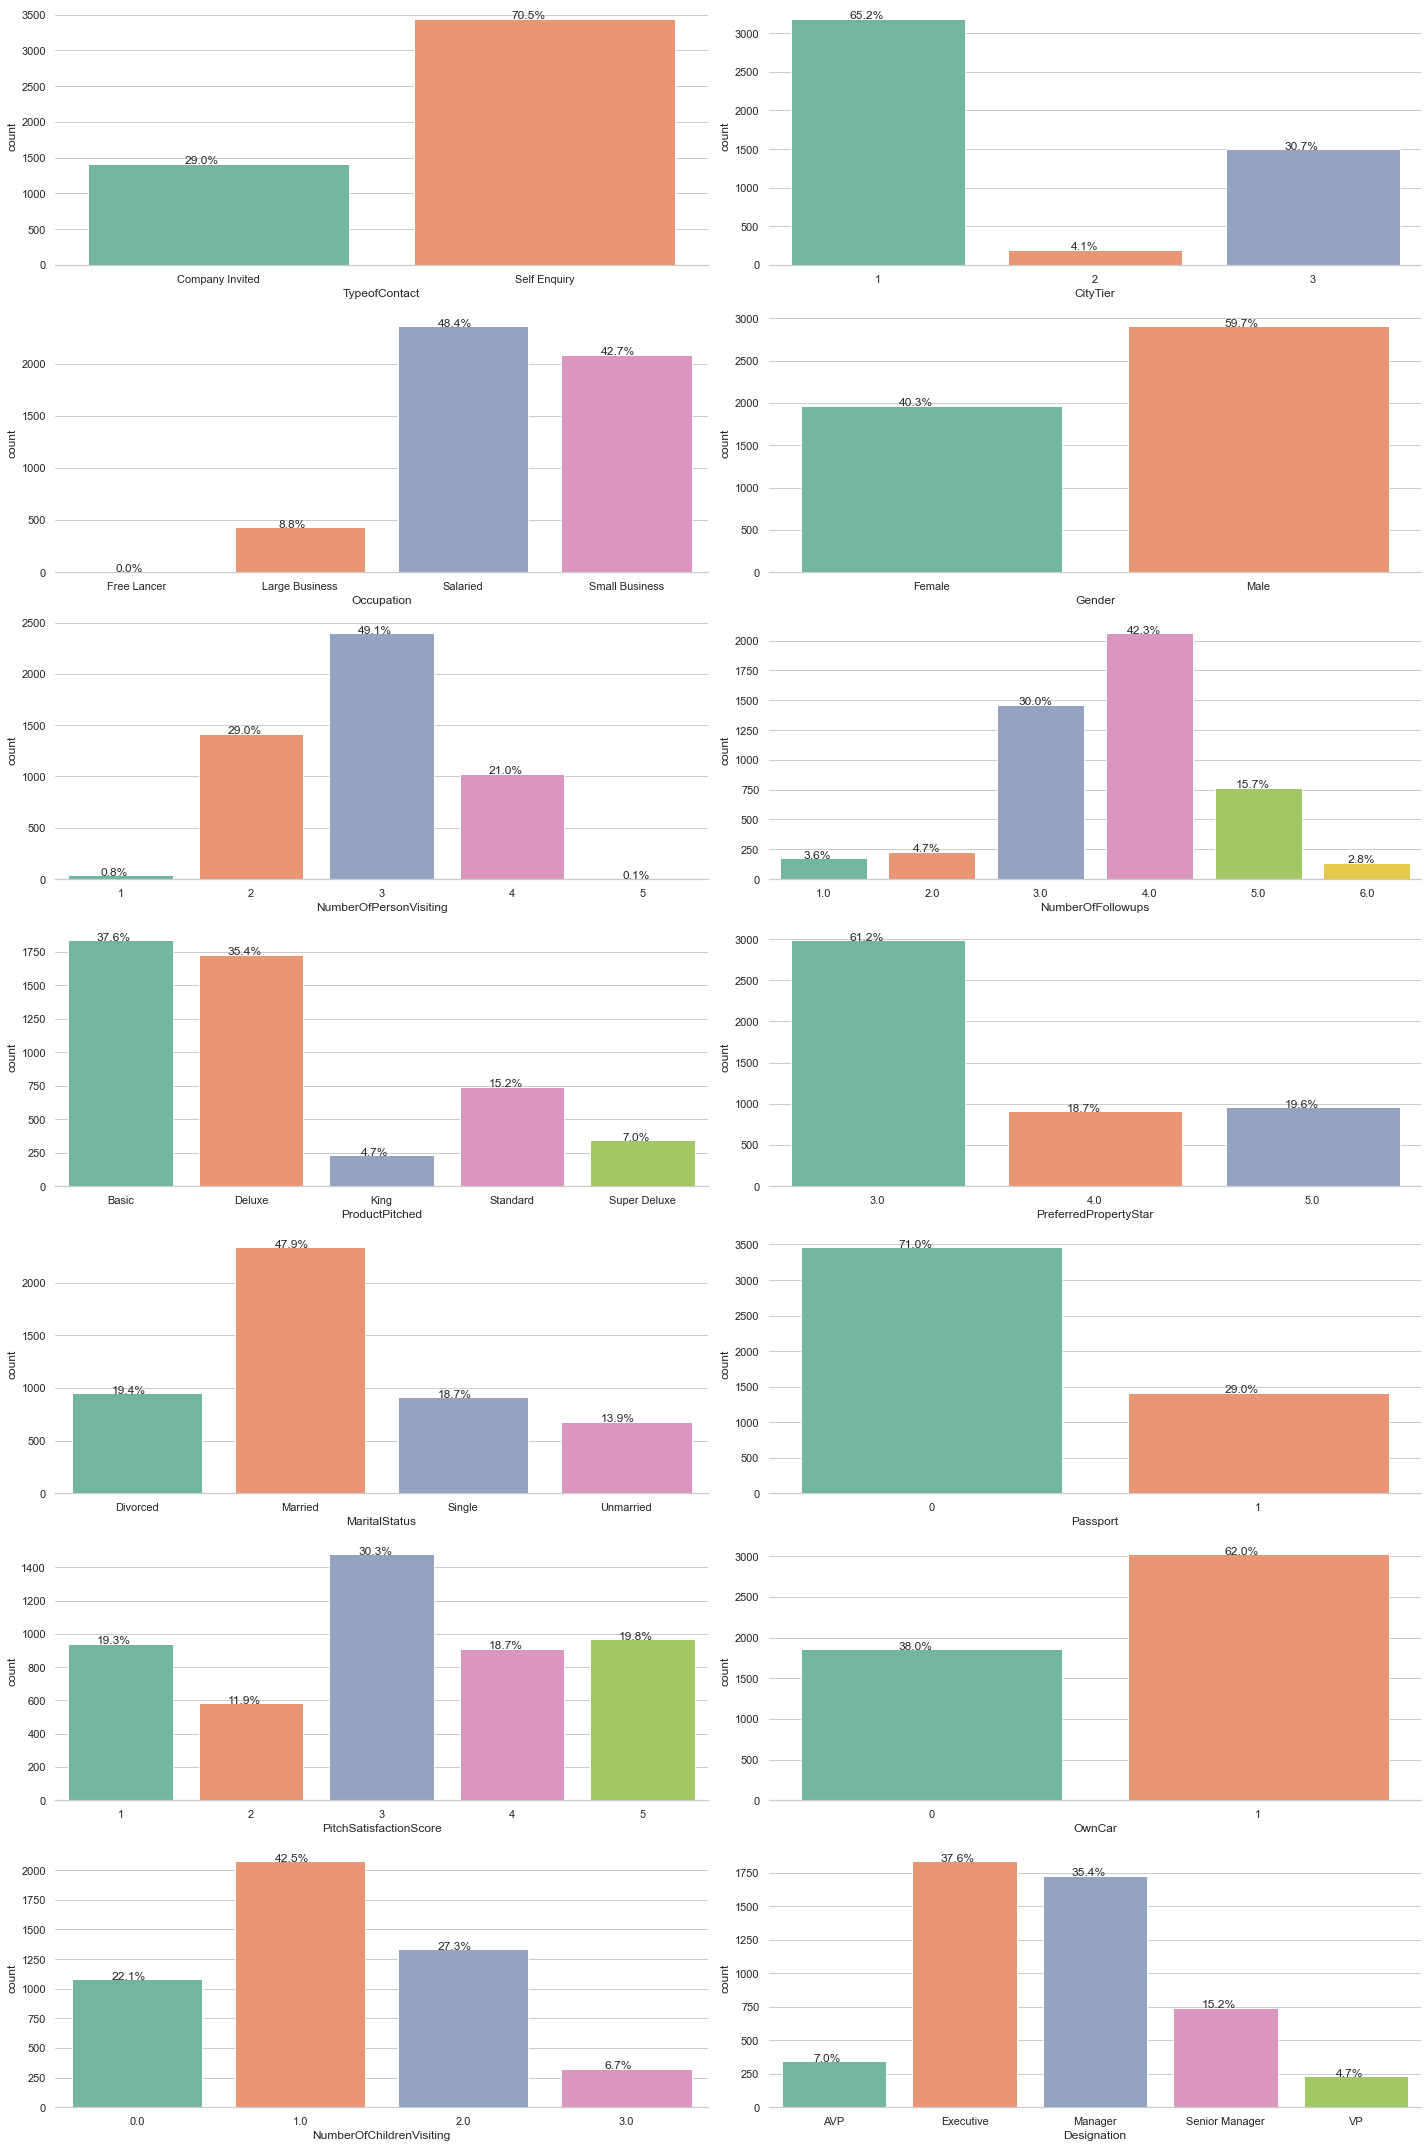

In [25]:
# Making a list of all categorical variables
categorical_columns = [ 'TypeofContact', 'CityTier','Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation']
plt.figure(figsize=(20,30))

sns.set_theme(style="whitegrid") # just trying to make visualisation better. This will set background to white

for i, variable in enumerate(categorical_columns):
                     plt.subplot(7,2,i+1)
                     order = Tourism_data[variable].value_counts(ascending=False).index   
                     
                     sns.set_palette('Set2')
                     ax=sns.countplot(x = Tourism_data[variable], data=Tourism_data )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(Tourism_data[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     
                                     


### Analysis of categorical variables
`TypeofContact', 'CityTier','Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation`

***Person Visiting***

- Most customers have 3 perosns travelling with them. It may indicate family or friends trip. There are only 0.8 % doing solo trip.
- Only 0.1% people visit in a group of 5 people.

***Occupation***

- The majority of customers i.e. 91% are either salaried or owns a small business.

***City Tier***

- 65% of customer are from tier 1 cities. This can be because of better living standards and exposure as compared to tier 2 and tier 3 cities.

***Gender***

- There are ~ 60 % `Male` and 40% `Female`.


***Number of Follow ups***

- Company usually do 3 or 4 times follow-ups with their customers.
- We can explore this further and observe which number of follow-ups have more customers who buy the product.

***Product Pitched***

- The company pitches Deluxe or Basic packages to their customers more than the other packages.
- This might be because the company makes more profit from Deluxe or Basic packages or these packages are less expensive, so preferred by the majority of the customers.

***Preferred Property Star***

- ~ 61% of customers prefer the three-star property.
- ~  39% of customers prefer 4 or 5 star properties. High income group may prefer high star properties.

***Type of Contact***

- There are approx 70% of customers who reached out to the company first i.e. self-inquiry.
- This shows the positive outreach of the company as most of the inquires are initiated from the customer's end.

***Marital Status***

- ~ 50 % enquiry are from married people.
- It may be due to that company offers more couple-friendly or family packages.
- May be couples are more interesd in taking trips.

***Passport***

- ~ 71% do not have a passport
- Such customers will only do national trip.
- The company should provide services to help customers with getting new or renewing their passport to attract more customers for international trip.

***Pitch Satisfaction Score***

- Average i.e. 3 is the most common pitch satisfaction score given by customers.
- We can explore this further and observe which satisfaction score has more customers who actually buy the product.

***Designation***

- ~ 73% of the customers are at the executive or manager level.
- It seems Trips has some assocation with salary/designation of customer.

***Number of Children Visiting***

- ~ 78% of customers visit with their children and ~ 34% visit with 1 child.
- 22% of customers visit without children. These may be the single/unmarried, divorced, and recently married customers. 



## Bivariate Analysis

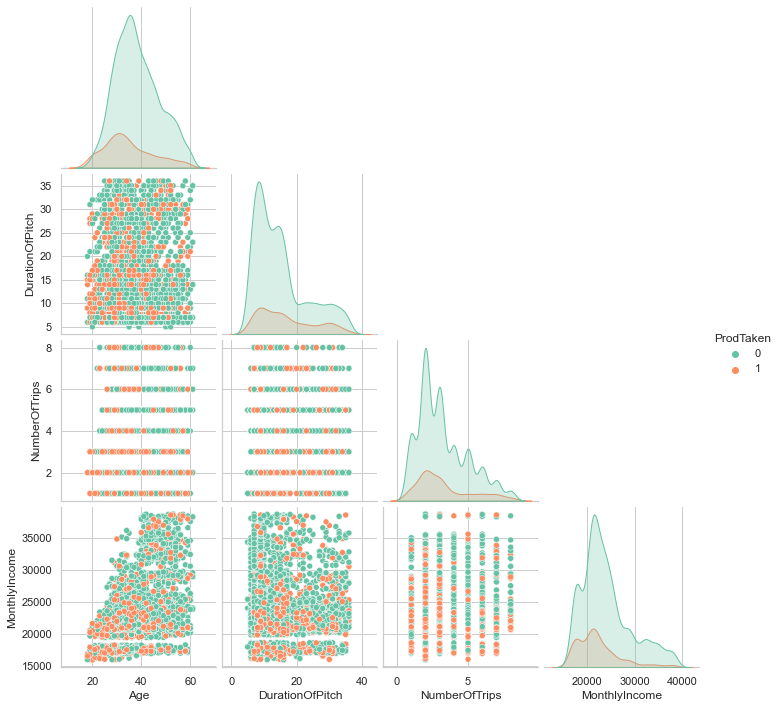

In [26]:
sns.pairplot(data = Tourism_data,hue ='ProdTaken', corner = True)

- Since the person who took the prodcut and who don't are not clearly sepearated, so we can't comment much from this graph.
- We will analyse relation of prod taken vs other variables using other plots.


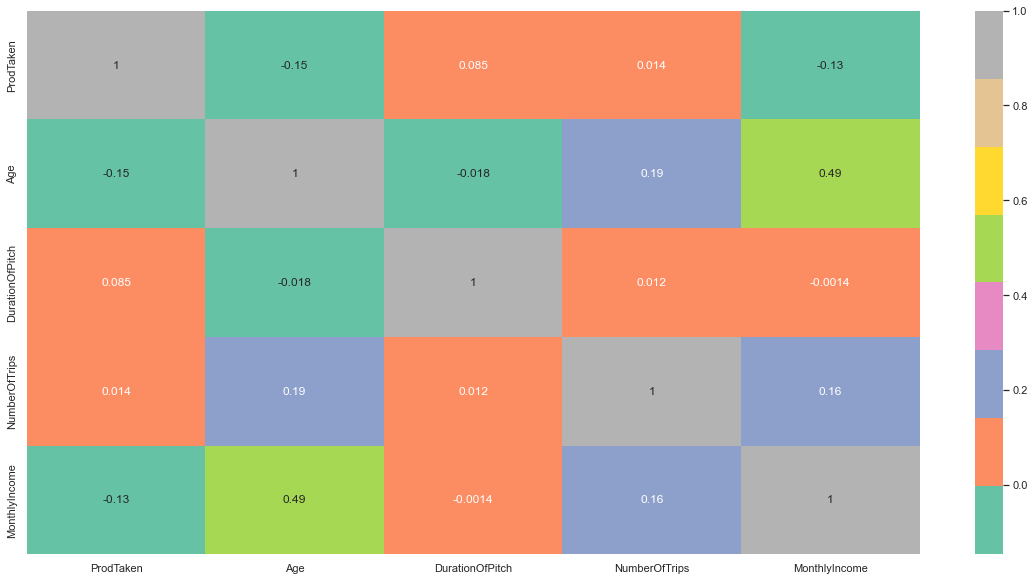

In [27]:
# Correlation Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(Tourism_data.corr(), annot=True, cmap="Set2");

- `Prod Taken` has negative correlation with Age, Monthly income. It may due to the fact that as `Age` increases, people are less likely to buy tourism package.
- `Age` and `monthly income` are positively correlated with correlation coefficient of 0.5.
- `Number of trips` and `Monthly income` are slightly correlated.
- The Number of trips and age have a weak positive correlation(0.19).
- No other variables have a high correlation among them.


**Let's define one more function to plot stacked bar charts**

In [28]:
def bar_stacked_plot(x):
    
    sns.set_palette(sns.color_palette("gist_rainbow", 8))
    tab1 = pd.crosstab(x,Tourism_data['ProdTaken'],margins=True)
    print(tab1)
    
    tab = pd.crosstab(x,Tourism_data['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(8,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    
    plt.legend(loc="lower left", labels=labels,title="ProdTaken",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) 
    
    plt.show()

### Prod Taken vs Number of Person Visiting

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
1                         39    0    39
2                       1148  266  1414
3                       1938  459  2397
4                        832  193  1025
5                          3    0     3
All                     3960  918  4878


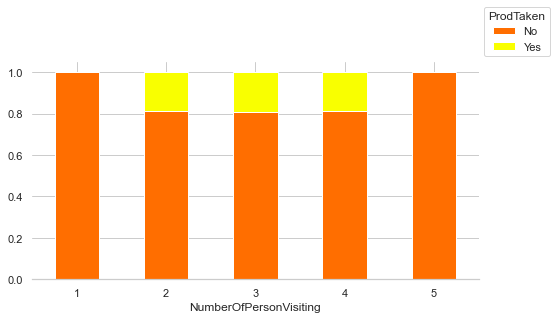

In [29]:
bar_stacked_plot(Tourism_data.NumberOfPersonVisiting)

- Conversion rate is high when the 1<number of persons<5.
- This might be because the company is not providing good solo toursim packages. There are 39 such customers.
- The conversion rate is zero when the number of persons visiting is 5. Since these numbers are just 3, so not much concern for the company.

### Prod Taken vs Number of Follow ups

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1219  243  1462
4.0                1685  378  2063
5.0                 576  191   767
6.0                  82   54   136
All                3923  910  4833


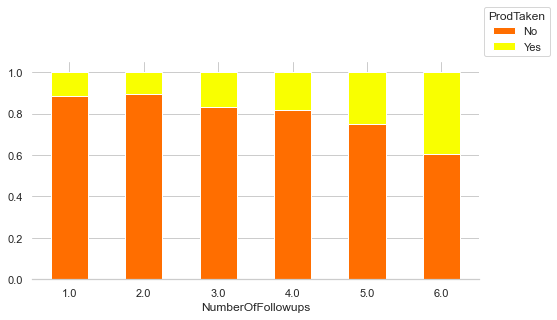

In [30]:
bar_stacked_plot(Tourism_data.NumberOfFollowups)


- Conversion rate increases with increase in number of follow up. It is maximum when number of follow ups increases to 6.
- There are total 910 customers who have taken the product after follow ups.
- When number of follow ups increses from 4 to 6, conversion rate increses by 20%.
- The Salesperson should increase follow up with the interested buyers.

### Prod Taken vs Occupation

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   312  118   430
Salaried        1948  414  2362
Small Business  1700  384  2084
All             3960  918  4878


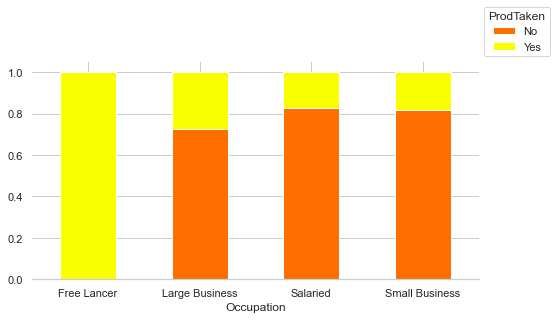

In [31]:
bar_stacked_plot(Tourism_data.Occupation)

- Freelancer have 100% conversion rate but there is just 2 such observation, so we may not generalize it.
- The conversion rate for large business owners is higher than salaried or small business owners. 
- One reason can be, large business owners have high income, so they are more interested in buying the produtct.
- Conversion rate for salaried or small business owners are almost same.

### Prod Taken vs Marital Status

ProdTaken         0    1   All
MaritalStatus                 
Divorced        824  124   948
Married        2012  326  2338
Single          610  302   912
Unmarried       514  166   680
All            3960  918  4878


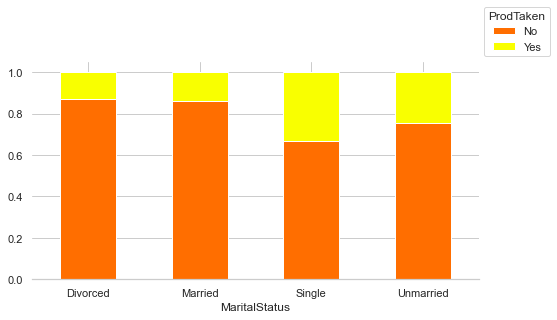

In [32]:
bar_stacked_plot(Tourism_data.MaritalStatus)

- Conversion rate for married and divorced customers is less than those for single and unmarried customers.
- Conversion rate is high for single and unmarried customers, so company can focus them so maximize sales.

### Prod Taken vs Passport

ProdTaken     0    1   All
Passport                  
0          3036  426  3462
1           924  492  1416
All        3960  918  4878


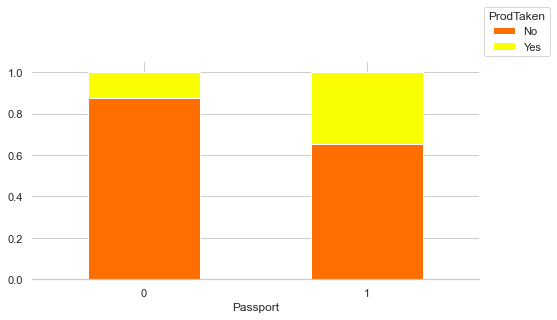

In [33]:
bar_stacked_plot(Tourism_data.Passport)

- The conversion rate for customers with a passport is higher as compared to the customers without a passport.
- The company should target customers with passport for maximizing the sale of international tourism packages.

### Prod Taken vs Product Pitched

ProdTaken          0    1   All
ProductPitched                 
Basic           1286  550  1836
Deluxe          1524  204  1728
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3960  918  4878


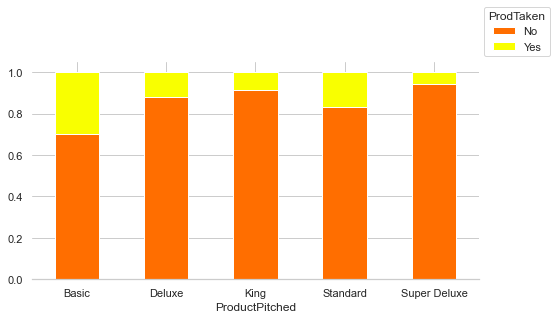

In [34]:
bar_stacked_plot(Tourism_data.ProductPitched)

- The conversion rate of customers is higher if the product pitched is Basic. This might be because the basic package is less expensive, so more affordability by most customers.
- King and Super Delux has lower conversion rate. Super Delux has lower conversion as they are costly. 
- Compnay can focus on Basic and standard pacakage as they higher conversion rate.

### Prod Taken vs Designation

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1286  550  1836
Manager         1524  204  1728
Senior Manager   618  124   742
VP               210   20   230
All             3960  918  4878


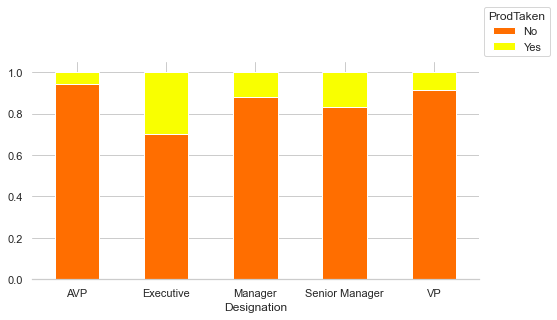

In [35]:
bar_stacked_plot(Tourism_data.Designation)

- The conversion rate of executives is higher than other designations.
- Customers at VP and AVP positions have the least conversion rate.

### Prod Taken vs Duration of Pitch

ProdTaken           0    1   All
DurationOfPitch                 
5.0                 6    0     6
6.0               268   39   307
7.0               294   48   342
8.0               273   60   333
9.0               403   79   482
10.0              198   44   242
11.0              167   36   203
12.0              161   33   194
13.0              191   32   223
14.0              212   41   253
15.0              216   52   268
16.0              217   56   273
17.0              148   24   172
18.0               56   19    75
19.0               36   21    57
20.0               46   19    65
21.0               57   16    73
22.0               66   23    89
23.0               58   21    79
24.0               54   16    70
25.0               59   14    73
26.0               60   12    72
27.0               58   14    72
28.0               44   17    61
29.0               53   21    74
30.0               65   30    95
31.0               52   31    83
32.0               59   15    74
33.0      

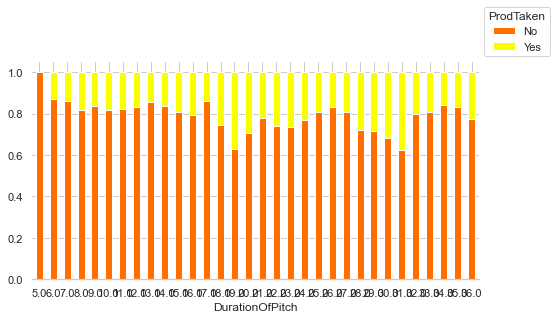

In [36]:
bar_stacked_plot(Tourism_data.DurationOfPitch)

We can't much comment from this graph as conversion rate is non-uniformly changing with the `DurationOfPitch`.

### Prod Taken vs Monthly Income

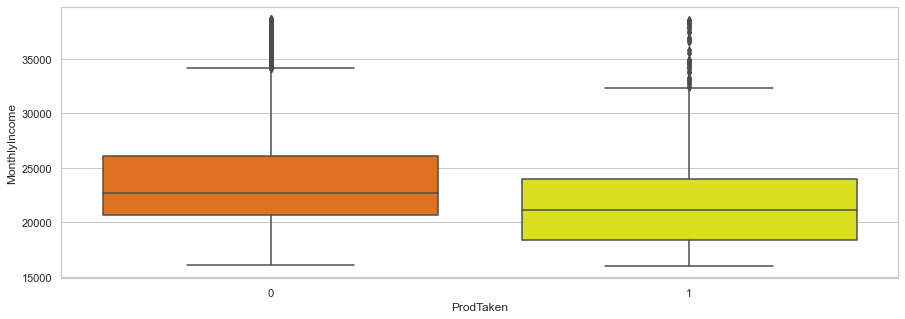

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(y='MonthlyIncome',x='ProdTaken',data=Tourism_data)
plt.show()

- The distribution looks right-skewed for both class(0,1).
- Customers who purchased a package have a lower median income than who don't. 
- For more analysis, we can add the feature 'Designation' to this plot.

### Prod Taken vs Monthly Income vs Designation 

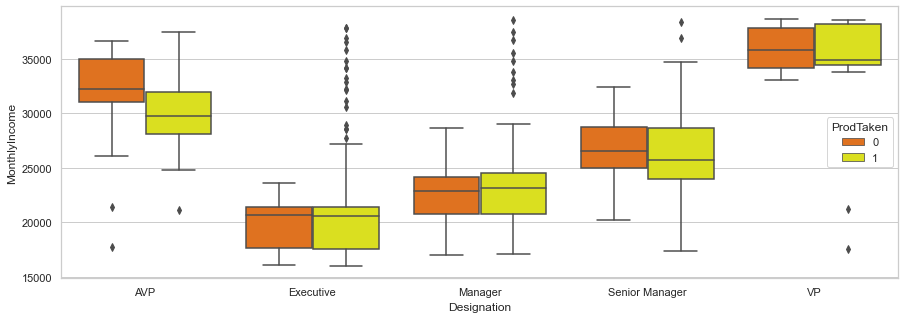

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(y='MonthlyIncome',x='Designation',hue='ProdTaken',data=Tourism_data)
plt.show()

- As expected, the higher the position higher the monthly income of the customer.
- Not much difference in the income of customers at the executive or manager level who did/did not purchase a package. There are many outliers for customers who purchased a package. 
- Customers at VP or AVP positions who purchase a package have a slightly lower median income.

### Prod Taken vs Age

<AxesSubplot:xlabel='Age', ylabel='ProdTaken'>

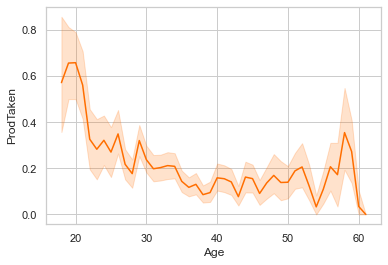

In [39]:
sns.lineplot(x='Age',y='ProdTaken',data=Tourism_data)

- This plot shows that younger people are more likely to take the product as compared to middle-aged or old people.
- There is a small peak at the age near 60. These might be people who are retired or about to be retired. 

### Grouping data w.r.t to packages to build customer profiles

In [40]:
# Grouping basic pacakgae with product taken
Tourism_data[(Tourism_data['ProductPitched']=='Basic') & (Tourism_data['ProdTaken']==1)].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,550.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,513.0,31.292398,9.088340,18.0,25.0,30.0,35.0,59.0
DurationOfPitch,530.0,15.811321,7.915090,6.0,9.0,14.0,22.0,36.0
NumberOfTrips,545.0,3.166972,1.836019,1.0,2.0,3.0,3.0,8.0
MonthlyIncome,527.0,20165.466793,3317.026073,16009.0,17546.0,20582.0,21406.5,37868.0


- There are 550 people taking the basic package
- There are 75 % people with 35 years age.
- There are 75 % people taking 3 trips.
- Average monthly income for customers is ~20,165.

In [41]:
# Grouping Standard pacakgae with product taken
Tourism_data[(Tourism_data['ProductPitched']=='Standard') & (Tourism_data['ProdTaken']==1)].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,124.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
Age,123.0,41.008130,9.876695,19.0,33.00,38.0,49.0,60.0
DurationOfPitch,123.0,19.065041,9.048811,6.0,11.00,17.0,29.0,36.0
NumberOfTrips,123.0,3.016260,1.815163,1.0,2.00,2.0,4.0,8.0
MonthlyIncome,124.0,26035.419355,3593.290353,17372.0,23974.75,25711.0,28628.0,38395.0


- There are 124 people who have taken the standard product.
- Average age for customers opting for the standard package is ~41
- `DurationOfPitch` has mean value of 19	
- There are 75 % customers who is taking 4 trips.
- Average monthly income of customers in this group is ~26,035.

In [42]:
# Grouping Deluxe pacakgae with product taken
Tourism_data[(Tourism_data['ProductPitched']=='Deluxe') & (Tourism_data['ProdTaken']==1)].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,204.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,198.0,37.641414,8.469575,21.0,32.0,35.5,44.0,59.0
DurationOfPitch,180.0,19.100000,9.227176,6.0,11.0,16.0,28.0,36.0
NumberOfTrips,202.0,3.702970,2.022483,1.0,2.0,3.0,5.0,8.0
MonthlyIncome,195.0,23106.215385,3592.466947,17086.0,20744.0,23186.0,24506.0,38525.0


- Average monthly income of customers opting for the deluxe package is ~23,106.
- Average age for customers opting for the deluxe package is ~37
- Majority of the customers opting for the deluxe package are at manager designation
- Majority of the customers opting for the deluxe package are married

In [43]:
# Grouping Super Deluxe pacakgae with product taken
Tourism_data[(Tourism_data['ProductPitched']=='Super Deluxe') & (Tourism_data['ProdTaken']==1)].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
Age,20.0,43.500000,4.839530,39.0,40.0,42.0,45.25,56.0
DurationOfPitch,20.0,18.500000,7.330542,8.0,15.0,18.5,20.00,31.0
NumberOfTrips,19.0,3.263158,2.490919,1.0,1.0,2.0,5.50,8.0
MonthlyIncome,20.0,29823.800000,3520.426404,21151.0,28129.5,29802.5,31997.25,37502.0


- Average monthly income of customers opting for the super deluxe package is ~29,823.
- Average age for customers opting for the super deluxe package is ~43


In [44]:
# Grouping King pacakgae with product taken
Tourism_data[(Tourism_data['ProductPitched']=='King') & (Tourism_data['ProdTaken']==1)].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
Age,20.0,48.900000,9.618513,27.0,42.00,52.5,56.0,59.0
DurationOfPitch,20.0,10.500000,4.135851,8.0,8.00,9.0,9.0,19.0
NumberOfTrips,17.0,3.411765,1.938389,1.0,2.00,3.0,4.0,7.0
MonthlyIncome,20.0,34672.100000,5577.603833,17517.0,34470.25,34859.0,38223.0,38537.0


- Average monthly income of customers opting for the king package is ~34,672.
- Average age for customers opting for the king package is ~49



### Split the dataset into train and test sets

In [45]:
#Separating target variable and other variables
X =Tourism_data.drop(columns='ProdTaken')
Y =Tourism_data['ProdTaken']

***`DurationOfPitch', 'NumberOfFollowups', 'ProductPitched', 'PitchSatisfactionScore'` columns would not be available during model prediction on new data, so we should drop them.***

In [46]:
#Dropping columns
X.drop(columns=['DurationOfPitch','NumberOfFollowups','ProductPitched','PitchSatisfactionScore'],inplace=True)

In [47]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

**Data has missing values. We will impute missing values using median for continuous variables and mode for categorical variables. We will use `SimpleImputer` to do this.**



In [48]:
Imputed_data=SimpleImputer(strategy='median')

median_imputed_col=['Age','MonthlyIncome','NumberOfTrips']

#Fit and transform the train data
X_train[median_imputed_col]=Imputed_data.fit_transform(X_train[median_imputed_col])

#Transform the test data i.e. replace missing values with the median calculated using training data
X_test[median_imputed_col]=Imputed_data.transform(X_test[median_imputed_col])

In [49]:
Imputed_data2=SimpleImputer(strategy='most_frequent')

mode_imputed_col=['TypeofContact','PreferredPropertyStar','NumberOfChildrenVisiting']

#Fit and transform the train data
X_train[mode_imputed_col]=Imputed_data2.fit_transform(X_train[mode_imputed_col])

#Transform the test data i.e. replace missing values with the mode calculated using training data
X_test[mode_imputed_col]=Imputed_data2.transform(X_test[mode_imputed_col])

In [50]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64
------------------------------
Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64


**Let's create dummy variables for string type variables and convert other column types back to float.**

In [51]:
#converting data types of columns to float
for column in ['NumberOfPersonVisiting', 'Passport', 'OwnCar']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

In [52]:
#List of columns to create a dummy variables
col_dummy=['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'CityTier']

In [53]:
#Encoding categorical varaibles
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

# Building the model

### Model evaluation criterion:

#### The model can make wrong predictions as:
1. False Positive - Loss of resources
2. False Negative - Loss of opportunity

#### Which case is more important? 
* False Negative can lead to loss of oppurunity and hence losing a prospective customer. 

#### How to reduce this loss i.e False Negatives?
* The company should maximize the Recall, the greater the Recall lesser the chances of False Negatives.

**Let's create two functions to calculate different metrics and confusion matrix**

In [54]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [55]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.871585  0.641304   0.665414  0.653137


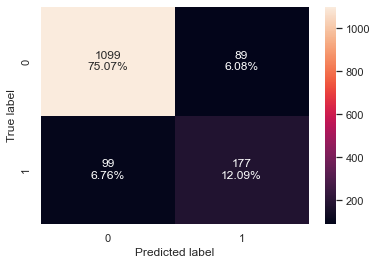

In [56]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree, X_train,y_train)
print("Training performance:\n", d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree, X_test,y_test)
print("Testing performance:\n", d_tree_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

- The model is overfitting the training data as training recall/precision is much higher than the test recall/precision

### Cost Complexity Pruning

**Check for performanc improvement by pruning the tree **

In [57]:
path = d_tree.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [58]:
clfs_list = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs_list.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs_list[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.019282372972987682


In [59]:
#Fitting model for each value of alpha on training set
recall_train=[]
for clf in clfs_list:
    pred_train=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train)
    recall_train.append(values_train)

In [60]:
#Fitting model for each value of alpha on test set
recall_test=[]
for clf in clfs_list:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test)
    recall_test.append(values_test)

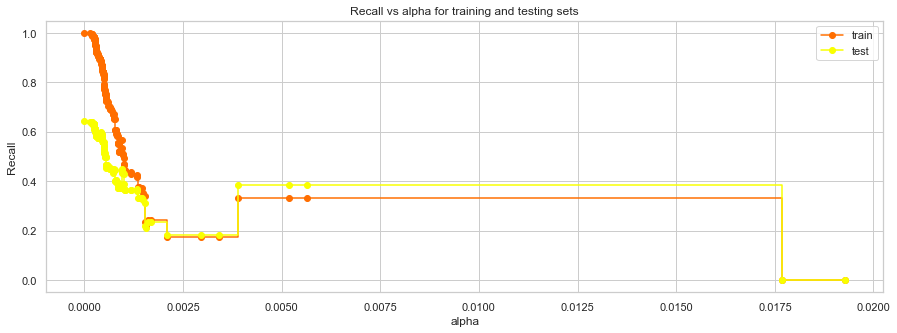

In [61]:
#Plotting the graph for Recall Vs alpha 
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.871585  0.641304   0.665414  0.653137


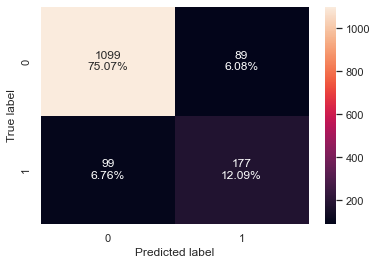

In [62]:
#Creating the model where we get highest test recall
index_best_pruned_model = np.argmax(recall_test)

pruned_dtree_model = clfs_list[index_best_pruned_model]

#Calculating different metrics
pruned_dtree_model_train_perf=model_performance_classification_sklearn(pruned_dtree_model, X_train,y_train)
print("Training performance:\n", pruned_dtree_model_train_perf)
pruned_dtree_model_test_perf=model_performance_classification_sklearn(pruned_dtree_model, X_test,y_test)
print("Testing performance:\n", pruned_dtree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(pruned_dtree_model,X_test,y_test)

-  Test recall is maximum is for the model without pruning i.e. alpha=0
- There is no improvement in the model performance (pruning vs without pruning)
- Let's try hyperparameter tuning, with class weights to compensate for the imbalanced data, and see if the model performance improves.

### Hyperparameter Tuning

In [63]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=5,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.803456  0.663551   0.483541  0.559422
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.777322  0.652174   0.439024  0.524781


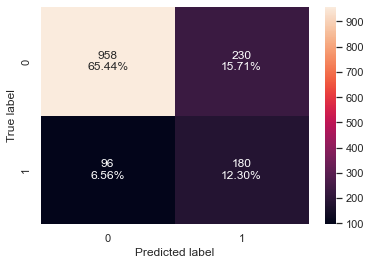

In [64]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance:\n", dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test,y_test)
print("Testing performance:\n", dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

- The model is generalizing well and not overfitting the data
- The recall is still similar on the test data but the precision has decreased significantly.

## Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.894126  0.51087   0.875776  0.645309


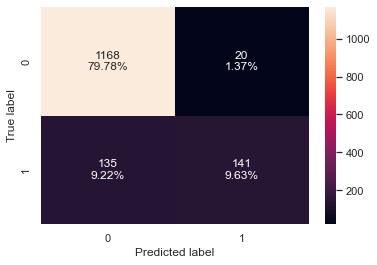

In [65]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

- With default parameters, random forest is performing better than decision tree in terms of precision but has less recall.
- The model is overfitting the training data.
- Goal: We'll try to reduce overfitting and improve recall by hyperparameter tuning.

### Hyperparameter Tuning

In [66]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=15,
                       max_features=None, min_samples_leaf=11, n_estimators=60,
                       oob_score=True, random_state=1)

Training performance:
    Accuracy   Recall  Precision       F1
0   0.89133  0.88162   0.657375  0.75316
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.814891  0.663043   0.506925  0.574568


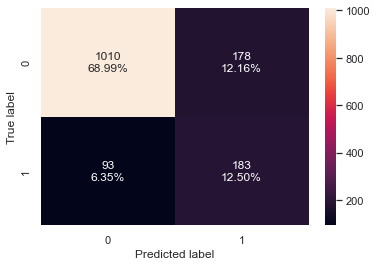

In [67]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned, X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned, X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

- The overfitting has been reduced after tuning the model.
- The recall has improved on the test data but the precision has decreased significantly.

## Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.990334  0.951713   0.996737  0.973705
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.886612  0.51087   0.819767  0.629464


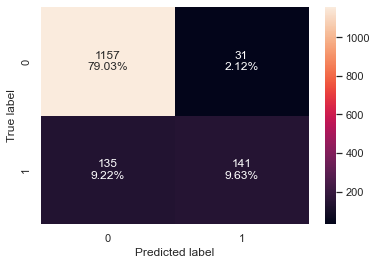

In [68]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier, X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier, X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

- With default parameters, the bagging classifier is performing well in terms of precision but has less recall.
- The model is overfitting the training data.
- Goal: We'll try to reduce overfitting and improve recall by hyperparameter tuning.

### Hyperparameter Tuning

In [69]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999121  0.995327        1.0  0.997658
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.900956  0.554348   0.874286  0.678492


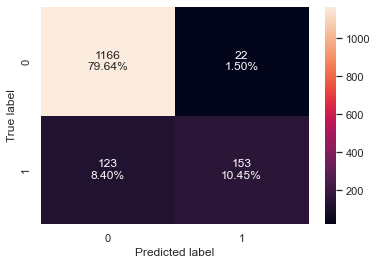

In [70]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

- The recall and precision on test data have improved but the model is still overfitting the training data.
- The recall is still very low.

## AdaBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.845343  0.299065   0.711111  0.421053
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.842213  0.282609   0.702703  0.403101


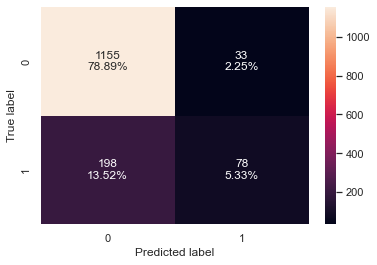

In [71]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier, X_train,y_train)
print("Training performance:\n",ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier, X_test,y_test)
print("Testing performance:\n",ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

- The model is not overfitting the data but has very low recall on training and test data.

### Hyperparameter Tuning

In [72]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.2000000000000002, n_estimators=100,
                   random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.983304  0.928349   0.981878  0.954363
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.860656  0.557971   0.652542  0.601562


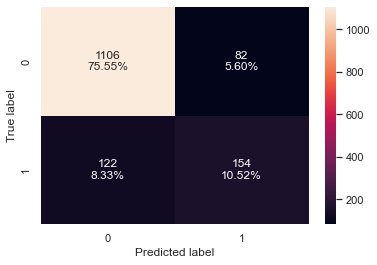

In [73]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, X_train,y_train)
print("Training performance:\n",abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, X_test,y_test)
print("Testing performance:\n",abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

- The train and test recall, have improved significantly but the model is overfitting the training data now.

## Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.878735  0.433022   0.847561  0.573196
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.861339  0.373188   0.774436  0.503667


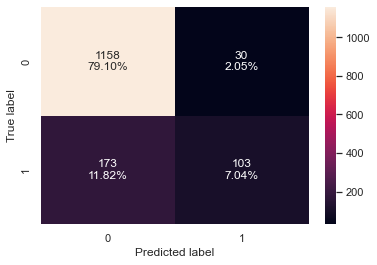

In [74]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier, X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier, X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

- The model is slightly overfitting the training data in terms of recall and precision but is giving very low recall on training and test data.
- The recall is better as compared to AdaBoost with default parameters but still not great.

### Hyperparameter Tuning

In [75]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.8)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.910662  0.58567   0.906024  0.711447
Testing performance:
    Accuracy    Recall  Precision    F1
0  0.864754  0.438406   0.737805  0.55


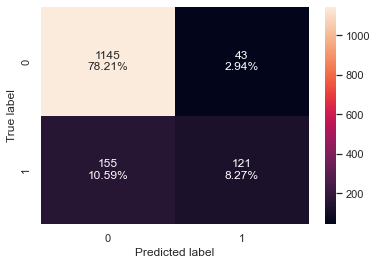

In [76]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned, X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned, X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

- The model performance has improved slightly after hyperparameter tuning but the model is still overfitting the training data.
- The test precision has decreased slightly and the test recall has increased slightly but still very low. 

## XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.994728  0.971963        1.0  0.985782
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.889344  0.554348   0.796875  0.653846


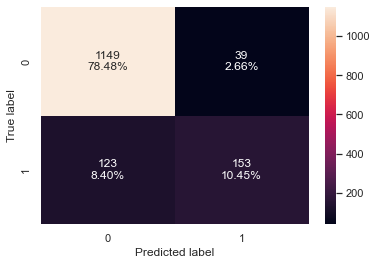

In [77]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric= "error")
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier, X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier, X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

- With default parameters, the model is overfitting the training data.
- The model is not able to correctly identify potential customers i.e. the test recall is very low.

### Hyperparameter Tuning

In [78]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned, X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned, X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

- The overfitting has reduced after hyperparameter tuning but is still an overfit model.
- The tuned xgboost model is giving the highest recall among all the models.


## Stacking Classifier

- Stacking classifier stacks the output of individual estimators and use a classifier to compute the final prediction
- Stacking allows using the strength of each estimator by using their output as input to final estimator

In [ ]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier, X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier, X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

- Stacking classifier has better recall but lesser precison than Xgboost.
- Model is overfitting the training data.

## Comparing all models

In [80]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,pruned_dtree_model_train_perf.T, dtree_estimator_model_train_perf.T, rf_estimator_model_train_perf.T,
    rf_tuned_model_train_perf.T,bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Prunned Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
     "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
     
    ]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Prunned Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned
Accuracy,1.0,1.0,0.803456,1.0,0.891330,0.990334,0.999121,0.845343,0.983304,0.878735,0.910662
Recall,1.0,1.0,0.663551,1.0,0.881620,0.951713,0.995327,0.299065,0.928349,0.433022,0.585670
Precision,1.0,1.0,0.483541,1.0,0.657375,0.996737,1.000000,0.711111,0.981878,0.847561,0.906024
F1,1.0,1.0,0.559422,1.0,0.753160,0.973705,0.997658,0.421053,0.954363,0.573196,0.711447


In [82]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,pruned_dtree_model_test_perf.T, dtree_estimator_model_test_perf.T, rf_estimator_model_test_perf.T,
    rf_tuned_model_test_perf.T,bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Prunned Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
     "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    ]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Prunned Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned
Accuracy,0.871585,0.871585,0.777322,0.894126,0.814891,0.886612,0.900956,0.842213,0.860656,0.861339,0.864754
Recall,0.641304,0.641304,0.652174,0.510870,0.663043,0.510870,0.554348,0.282609,0.557971,0.373188,0.438406
Precision,0.665414,0.665414,0.439024,0.875776,0.506925,0.819767,0.874286,0.702703,0.652542,0.774436,0.737805
F1,0.653137,0.653137,0.524781,0.645309,0.574568,0.629464,0.678492,0.403101,0.601562,0.503667,0.550000


# Business Recommendations

Features | Recommendation
-------|:------------
Passports |  purchase the travel package. The company should customize more international packages to attract more such customers.
City Tier|  Very few customers from tier 2 cities. The company should expand its marketing strategies in tier 2 cities to increase sales.
Monthly Income| Customers with low income are more likely to buy basic package. Super Delax and King package should be pitched to customers at better designation with high income >=30k. 
Number of follow-ups| Customers with follow up>=1 are buying the package. Number of sales is increasing with number of follow ups, So Company should focus on increasing the follow-ups.
Marital Status | Single people are more likely to buy the offered packages. The company can offer discounts or customize the package to attract more couples, families, and customers 
Age| Company should target young single people 20-35 years to attract more sales.
 
 ***Conclusions***
- After we identify a potential customer, the company should pitch packages as per the customer's monthly income, designation, age, for example, we should pitch king, super delux to high income customer and basic, standard to low income customers. Generally, better designation implies better salary, Customer designation should also be taken into consideration while pitching a specific pacakage.
